In [3]:


from utils.black_scholes_model_oop import bs_model

bs = bs_model(100,100,1/12,0.02,0.2)

   Type      Prix    Delta     Gamma      Vega     Theta       Rho
0  Call  2.385279  0.52302  0.068984  0.114973 -0.052373  0.041597
1   Put  2.218751 -0.47698  0.068984  0.114973 -0.046903 -0.041597


[ 1.44955385  1.44955385  1.44955385 ... 56.17453885 56.18101329
 56.18748774]
[ 90.     90.001  90.002 ... 119.997 119.998 119.999]


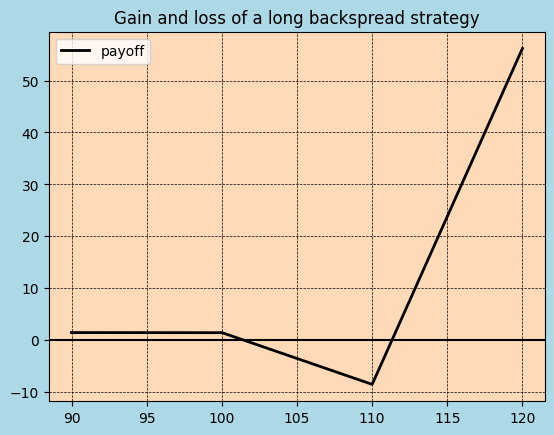

In [22]:
from strategies.backspread_call import backspread_call as bk
import matplotlib.pyplot as plt

bk1 = bk(100,110,1/12,101,0.03,0.2,90,120,0.001)
payoff= bk1.get_payoff()
S_T = bk1.get_ech_price()

print(payoff)
print(S_T)

fig, ax = plt.subplots(facecolor='lightblue')
ax.plot(S_T,payoff,color='black',linewidth=2,label='payoff')
ax.grid(color='black', linestyle='--', linewidth=0.5)
ax.set_facecolor('peachpuff')
ax.set_title('Gain and loss of a long backspread strategy')
ax.axhline(color='black')
ax.legend(loc='best')
plt.show()

<class 'numpy.ndarray'>


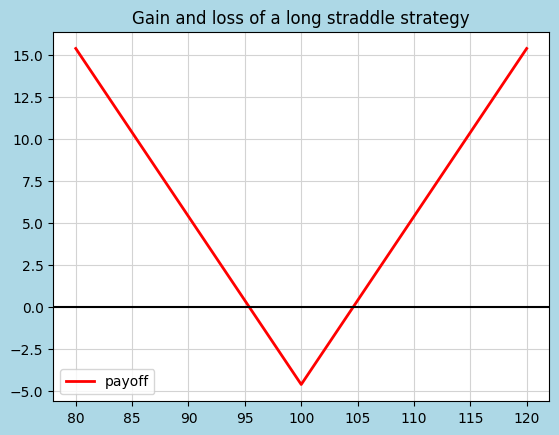

In [23]:
from strategies.long_straddle import LongStraddle
import matplotlib.pyplot as plt

ls = LongStraddle(100,100,1/12,0.02,0.2,80,120,0.001)
payoff,_= ls.get_payoff(S_T = None)
ech = ls.get_ech_price()

fig, ax= plt.subplots(facecolor = 'lightblue')
ax.plot(ech,payoff, color='red',linewidth=2,label='payoff')
ax.grid(color='lightgrey')
ax.grid(color='lightgrey')
ax.set_title('Gain and loss of a long straddle strategy')
ax.axhline(color='black')
ax.legend(loc='best')
plt.show()


    strike  impliedVolatility
0      5.0           4.500004
1     10.0           4.968754
2     15.0           6.140627
3     20.0           3.941406
4     25.0           3.628907
..     ...                ...
74   410.0           0.453130
75   420.0           0.476568
76   430.0           0.500005
77   440.0           0.633793
78   450.0           0.515630

[79 rows x 2 columns]


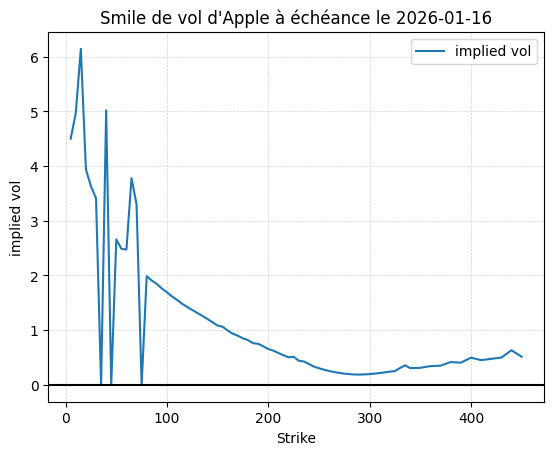

In [7]:
from utils.volatility_smile import Smile_call
import matplotlib.pyplot as plt

s = Smile_call('AAPl')
s.get_ticker_options()
implied_vol,expiry, opt_chain = s.get_implied_vol(4)

print(implied_vol)

fig, ax = plt.subplots()
ax.plot(implied_vol['strike'],implied_vol['impliedVolatility'], label='implied vol')
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
ax.axhline(color='black')
ax.set_title(f"Smile de vol d'Apple à échéance le {expiry}")
ax.set_xlabel('Strike')
ax.set_ylabel('implied vol')
ax.legend(loc='best')
plt.show()
